# CENSUS DATA ANALYSIS AND REPORT
## STUDENT ID: 202250330

In [2]:
# Importing all the libraries for the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Importing the data set and assigning the contents of the dataset to a new DataFrame "census_data"
census_data = pd.read_csv("census06.csv")

# Making a copy of the dataset for feature analysis of the occupation column
census_data1 = census_data.copy()

In [5]:
# Examining the columns and the first five rows of our dataset using the .head() function
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


In [6]:
# Examining the summary of the dataset using the .info() function
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [7]:
# check for missing values in the data set 
census_data.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

In [8]:
# initial analysis of the dataframe columns shows that the sum total of entries in each column is not equal
# meaning that some columns has missing or empty cells
# Also some of the columnslike Age column is an object instead of integer which means or dataset needs some cleaning. 
#E.g. Age is a numerical variable that in this case is casted as a sring object


#using .unique() to find out the unique values in the Age Column
census_data.Age.unique()

array(['50', '52', '69', '72', '36', '42', '38', '7', '29', '32', '62',
       '80', '56', '55', '25', '17', '63', '23', '22', '39', '41', '2',
       '1', '67', '65', '28', '27', '5', '4', '3', '20', '19', '49',
       '83.71794888354226', '14.0', '66', '82', '83', '44', '15', '21',
       '46', '45', '43', '64', '59', '34', '10', '9', '35', '0', '68',
       '48', '16', '81', '53', '8', '40', '51', '54', '58', '13', '61',
       '26', '47', '74', '79', '75', '70', '71', '102', '73', '24', '60',
       '30', '33', '11', '31', '61.61015620160364', '62.61015620160364',
       '15.0', '10.0', '18', '37', '12', '14', '6', '57', '89', '85',
       '78', '88', '91', '93', '97', '86', '77', '50.03241969022402',
       '51.03241969022402', '1.0', '90', '76', '104', '84', ' ', '92',
       '87', '95', '98', '105', '48.65904417229777', '50.65904417229777',
       '12.0', '54.55812337483672', '57.55812337483672', '3.0', '0.0',
       '106', '65.90982310589523', '68.90982310589523', '16.0', '94',

In [9]:
# Close examination of the Unique values above shows that the Age column contains empty cells
# Listing all the row where Age column contains empty cells
census_data[census_data.Age == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


### Because there are empty entries in Age Column, will check the entire dataset for where there are empty calls and convert them to NAN for easy Access

In [10]:
# Repalacing all empty string in the data set with NAN

census_data.replace(' ',np.nan,inplace=True)

# checking the number of nana values in each column again
census_data.isna().sum()


House Number                        0
Street                              0
First Name                          1
Surname                             1
Age                                 2
Relationship to Head of House       0
Marital Status                   2059
Gender                              0
Occupation                          0
Infirmity                           8
Religion                         2109
dtype: int64

In [11]:
# The above output after replacing the empty cells in the entire dataset with nana 
# shows that the following columns had empty cells
# First Name
# Suranme
# Age
# Marital Status
# Infirmity
# Religion

# Data Cleaning Using statistcial, logical and scientific reasoning
### For the "First Name" and the "Surname Column"

In [12]:
# the cleainiing of the dataset is done colunm by column 
# for the name and surname
# printing the rows where we have nan values for either the name or 'First Name' or the 'Surname'
census_data.loc[(census_data['First Name'].isna() |  census_data['Surname'].isna())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


### Using the House number and the street to deduce a logical inference of what to use to fill the missing "Surname" & "First Name" .

#### For the "First Name"

In [13]:
# For the "First Name"
census_data.loc[(census_data["House Number"] == 10) & (census_data["Street"]== "Thomas Drive")]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [14]:
# From the above results, it can be logically deduced that Talyor is married to Kerry Taylor 
# Checking if there are more than one Kerry Taylor
census_data[(census_data["First Name"] == "Kerry") & (census_data.Surname == "Taylor")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1801,8,Allen Mission,Kerry,Taylor,40,Head,Single,Female,"Engineer, manufacturing systems",None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [15]:
# There are 2 Kerry Taylor in the dataset who live on different streets
# Therefore i will fill the missing "First Name" with Thomas frim the its Street Column

In [16]:
# Since there are more than one Kerry tailer, i will use the first name in the street Colunm to replace kerry taylor
census_data["First Name"].fillna('Thomas', inplace = True)


# Confirming the Age First name column has no more missing values
census_data["First Name"].isna().sum()

0

### To fill the Surname missing values

In [17]:
# Using the Street and the House number to find all thos livin on 5 Gill Mews Street
census_data.loc[(census_data["House Number"] == 5) & (census_data["Street"]== "Gill Mews")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,NaN,Male,Student,None,NaN


In [18]:
# The Above Code shows that there are  3 people in the house and 
# it can be logically assumed that his Surname must be Adams

# Replacing His Surname nana value with Adams
census_data["Surname"].fillna('Adams', inplace = True)

# Confirming the Age First name column has no more missing values
census_data["First Name"].isna().sum()

0

In [19]:
# Confirming the rwo missing values in Surname and First name has been resolved
census_data.loc[[5553,7258]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,Adams,8,Son,NaN,Male,Student,None,NaN
7258,10,Thomas Drive,Thomas,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


### Resolving the Age Column missing values


In [20]:
### The rows where there are missing values in the Age column is below
census_data.loc[census_data.Age.isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian


In [21]:
# There are two values here. 
# I Will Use the age of the wife in the same household considerting the average age difference between couples in uk is 3years
# for newly weds to infer the age for Christopher Johnson since he is married

# Hugh Richards, i will also infer his age from his people in same house hold with him and his occupation since he is a university student
# Since he is a university student and single i used the mode age of all university student to fill his age value  "Relatiosnship to Head of the House" will be used to fill 

In [22]:
# For Christopher Johnson, checking the those living in the same household
census_data.loc[(census_data["House Number"] == 17) & (census_data["Street"]== "Andrews Mill")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2205,17,Andrews Mill,Sophie,Johnson,32,Head,Married,Female,Accounting technician,None,None
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
2207,17,Andrews Mill,Ronald,Johnson,3,Son,NaN,Male,Child,None,NaN


In [23]:
# From the office of national Statistic the average average age difference between couples in the uk is between 1-3 England and Wales.
# Taking this into consideration, i assumed that his age will be on the upper side since he is a male and filled his age with 35
# the website with the above statistics is given in the refernce section of the university 
# Replacing the Age NAN Value with not with 48( Mode of Husbands Age) where "Relationship to Head of House" == Husband
census_data.loc[(census_data["Age"].isna()) & (census_data["Relationship to Head of House"] == "Husband"), "Age"]= 32

In [24]:
census_data.loc[(census_data["House Number"] == 47) & (census_data["Street"]== "Smith Plains")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4315,47,Smith Plains,Ellie,Richards,52,Head,Married,Female,Financial adviser,None,Christian
4316,47,Smith Plains,Guy,Richards,48,Husband,Married,Male,Insurance claims handler,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian


In [25]:
# For Hugh Rechards, since is is the son in his house hold and is single, i used the mode of his occupation which is student to fill his age
# Locking down the values for those whose "Occupation" == University Student 
university_students_age= census_data.loc[ census_data["Occupation"] == "University Student"]

# Finding the Mode of Husbands Age
print(university_students_age.Age.mode())


0    19
Name: Age, dtype: object


In [26]:
# Replacing hugh Rechard Age NAN Value with  with 19( Mode of university Students Age) under the ocupation column 
census_data.loc[(census_data["Age"].isna()) & (census_data["Occupation"] == "University Student"), "Age"]= 19

In [27]:
# Confriming that both age values for NAN were correctly inputed
census_data.loc[[2206, 4317]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,32,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,19,Son,Single,Male,University Student,None,Christian


In [28]:
# The values in the age column are all strings

# casting the age column to float
census_data.Age = census_data.Age.astype(float)

# casting the age column to int
census_data.Age = census_data.Age.astype(int)

### For the Marital Status Column NAN Values

In [30]:
# In dealing with the marital Status, the following consideration are assumed
# For those whose age are below 20 and show occupation are is Student or child
# The legal age for marraige is 18 years and 
# Most of those who are student or child are single

In [31]:
# Checking the unique values in "Marrital Status" column
census_data["Marital Status"].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed'], dtype=object)

In [32]:
# Cheking for those who are less than 18 years and divorced
census_data.loc[(census_data.Age < 18) & (census_data["Marital Status"] == "Divorced")].count()[0]

0

#### For the above two codes, it reasonable to believe that anyone one is  <= 18 and not married ought to be single

In [33]:
# Resolving the Marital Status column based on the assumptions above


# Checking for thos who are less than 18 and Marital status is Nan
census_data.loc[(census_data["Marital Status"].isna()) & (census_data.Age < 18)].count()[0]

2056

In [34]:
# Replacing the Nan values with single
census_data.loc[(census_data["Marital Status"].isna()) & (census_data.Age < 18), "Marital Status" ] = "Not Applicable"

In [35]:
# Checking to see if there are any more remaing NAN values in Marital Status Column
census_data.loc[census_data["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [36]:
# Only 3 NAN values remains after 
# Seeing that two of this entried are 20 years and below, it can be reasonable assumed that they also are single
# We can also put their marital status as single

census_data.loc[(census_data["Marital Status"].isna()) & (census_data.Age <= 20), "Marital Status" ] = "Single"

In [37]:
# For the row where Marital status == NAN and age = 52, using the "House Number" == 53 and "Street" == Smith Plains
census_data.loc[(census_data["House Number"]== 53) & (census_data.Street == "Smith Plains") ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian
4331,53,Smith Plains,Richard,Hilton,27,Son,Single,Male,Barrister's clerk,None,Christian
4332,53,Smith Plains,Jean,Hilton,16,Daughter,Not Applicable,Female,Student,None,NaN


In [38]:
# From the above  codes, it reasonable to assume that she is married to Adrian Hilton and thus can be beleived to be married

# Filling the value
census_data.loc[(census_data["Marital Status"].isna()) & (census_data.Age == 52), "Marital Status" ] = "Married"


# Confirming that there is no more missing values in Marital Status column
census_data["Marital Status"].isna().sum()

0

### For the Infirmity Column

In [39]:


# In Dealing with the Infirmity Column, I assumed that anyone who did not fill this column or left it empty might not know the kind of
# disability or infection they have and since there are only 8 missing values, i joined them eith "Unknown Infection" Categories"


# Checking the unique values Infirmity column
census_data["Infirmity"].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', nan, 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

In [40]:
# Repalcing the NAN values with unknown
#replace the missing values in infirmity to unknow infection since their values is vary small(8)
census_data.loc[(census_data["Infirmity"].isna()), "Infirmity" ] = "Unknown Infection"

# Confirming that all the NAN values in Infirmity column has been resolved
census_data["Infirmity"].isna().sum()

0

In [41]:

# Checking the unique values Infirmity column
census_data["Infirmity"].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', 'Disabled', 'Blind', 'Deaf'], dtype=object)

### For the Religions Column

In [42]:
# For the Religiion column. All the nan Values i canverted to unknow while leaving the NoNe values as same 
# since we cannot logically determine from other columns what the religion of a particular students will be 
# using boxplot and bar chat to examine the column further

In [43]:
# Checking the unique variables in Religion
census_data["Religion"].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', 'Quaker'], dtype=object)

In [44]:
census_data["Religion"].isna().sum()

2109

#### Using fillforward to fill the Missing values for Religion

In [45]:
# Here we assume that a child will take the value of the parents religion if they since the parents name comes before the child in the data
# Also where there are more than one child in the family, the the first child will take the parent religion 
# while the second child will automatically assume the siblings religion

In [46]:
# Using the forward fill metthod
census_data["Religion"] = census_data.groupby(["Surname", "Street", "House Number"])["Religion"].ffill()

In [47]:
# Checking for remaining nan values
census_data["Religion"].isna().sum()

314

In [48]:
# Filling the misiing value of Adults(18 and above) with "Undeclared"
census_data.loc[(census_data.Religion.isna()) & (census_data.Age >=18), :] = census_data.loc[(census_data.Religion.isna()) & (census_data.Age >=18), :].fillna(value={"Religion":"Undeclared"})

In [49]:
#Filling the remaining missing values in religion with "Unknown"
census_data.loc[census_data.Religion.isna(), "Religion"] = "Unknown"

In [50]:
#Confirming that there no more missing values in Religion column
census_data["Religion"].isna().sum()

0

### Checking the summary of the dataset to confirm that all missing values have all been resolved

In [51]:

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   int32 
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 8329 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       8329 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 683.4+ KB


## Further Cleaning and prelimiranry Insight

# Detailed Analysis of the dataset

## For The Age Column

In [52]:
# Creating a Population Pyramid Plot Using the Age on Male and Female to examine the distribution of the city population
# I will also examine the birthrate, the death rate of the town to determine if the population of town is increasing or decreasing

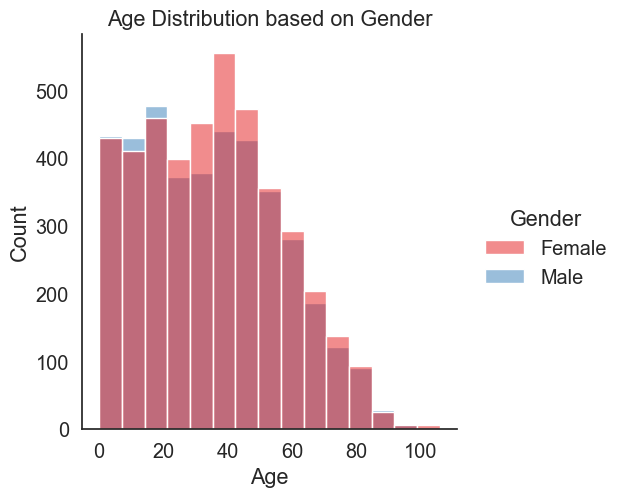

In [53]:
# Age Count based on the Male and Female Population
sns.set(font_scale=1.3)
sns.set_style("white")
Age_demographic_plot = sns.displot(x=census_data.Age, hue=census_data["Gender"], bins= 15, palette=("Set1")).set(title="Age Distribution based on Gender")
plt.savefig("Age_demoplot.png")

In [54]:
# To create the Age population pyramid plot to further examing the distribution of the famale and male living in the city

# Defining a function that will clasify our Age values into an different age bracket
def agerange(y):
    if y <= 4:
        return "0-4"
    elif y <= 9:
        return "5-9"
    elif y <= 14:
        return "10-14"    
    elif y <= 19:
        return "15-19"
    elif y <= 24:
        return "20-24"
    elif y <= 29:
        return "25-29"
    elif y <= 34:
        return "30-34"
    elif y <= 39:
        return "35-39"
    elif y <= 44:
        return "40-44"
    elif y <= 49:
        return "45-49"
    elif y <= 54:
        return "50-54"
    elif y <= 59:
        return "55-59"
    elif y <= 64:
        return "60-64"
    elif y <= 69:
        return "65-69"
    elif y <= 74:
        return "70-74"
    elif y <= 79:
        return "75-79"
    elif y <= 84:
        return "80-84"
    elif y <= 89:
        return "85-89"
    elif y <= 94:
        return "90-94"
    elif y <= 99:
        return "95-99"
    else:
        return "100+"
    

In [55]:
# Applying the agerange funtion to our age column and assigning the values to a new column in our dataframe 
census_data["Agerange"] = census_data["Age"].apply(agerange)

# Using head method to examine our new dataset
census_data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Agerange
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic,50-54
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic,50-54
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist,65-69
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist,70-74
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None,35-39


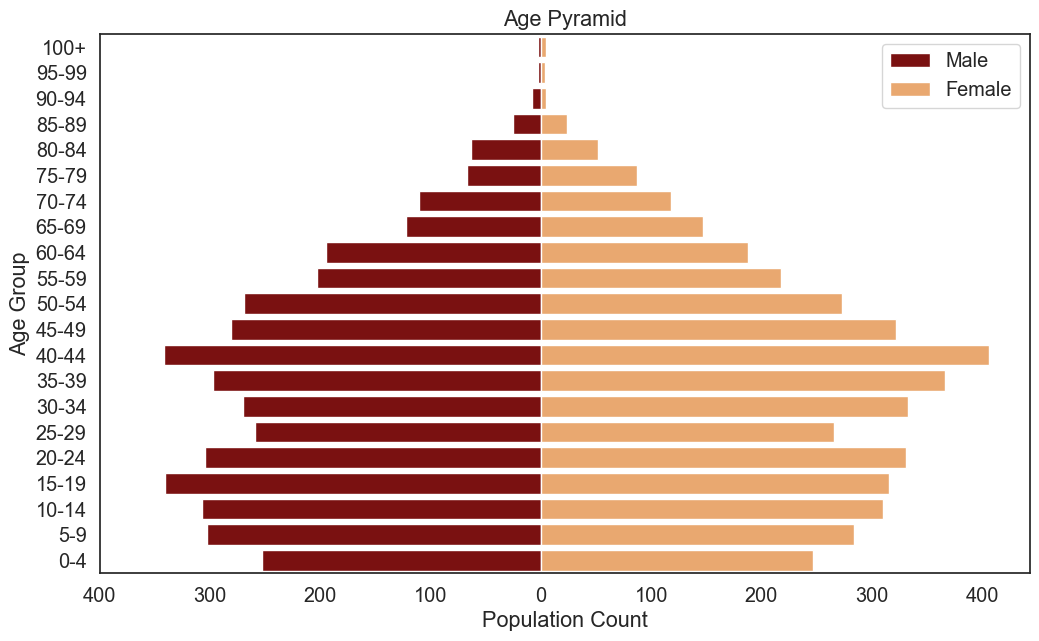

In [56]:
# here i will extract the Age and gender based on the Age range
# Then Creat a new dataframe for the population pyramid plot
# The male will be multipled by -1 so that the can appear on the left side

# Extracting the sum value of the male and female based on the values of our Agerange
male =  census_data["Agerange"][census_data.Gender == "Male"].value_counts().sort_index()
female =  census_data["Agerange"][census_data.Gender == "Female"].value_counts().sort_index()

# Using the male and femal calues to creat a new DATAFRAME
Age_df = pd.DataFrame({
    "Male": -1*male,
    "Female": female
})

#Adding the defined index to the new column
Age_df.index.names =["Age Range"]
Age_df.reset_index(inplace=True)
age_range_list =  ['100+', '95-99', '90-94', '85-89', '80-84','75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19' ,'10-14' ,'5-9','0-4']


# Plloting the Pupolation Pyramid
plt.figure(figsize=(12,7))
sns.set(font_scale=1.3)
sns.set_style("white")
age_pyramid = sns.barplot(x='Male', y='Age Range', data=Age_df, order=age_range_list, color = "darkred", label='Male')
age_pyramid = sns.barplot(x='Female', y='Age Range', data=Age_df, order=age_range_list, color=('#FDA75C'), label='Female')
plt.xticks([-400, -300, -200, -100, 0, 100, 200, 300, 400],[400, 300, 200, 100, 0, 100, 200, 300, 400])
age_pyramid.legend()
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

#saving the figure
plt.savefig("age_pyramid")

In [57]:
## Calculating the birth rate per every 1000 women
### Assumtion
### 1. The legal Age of getting married is chosen as the minimum age a woman can bear children 18years
### 2. Women Biological clock age of 45years as the maximum age a woman can natural get pregnant
### 3. Considering the number of  4 years olds and below and taking their average


In [58]:
# Calculating the percentage of the male and female populations in the city

Males = census_data[census_data.Gender == "Male"].count()[0]
Females = census_data[census_data.Gender == "Female"].count()[0]

#Percentage population based on gender
Percent_Male = (Males/8329)*100
Percent_Female = (Females/8329)*100


# Printing the results
print(f"The percentage male population is {round(Percent_Male)}%")
print(f"The percentage female population is {round(Percent_Female)}%")

The percentage male population is 48%
The percentage female population is 52%


### Calculatting the brith 

In [59]:
# # Children less than 1 years old
# One_Year_Olds = (census_data.Age <= 4).sum()

# # Women ithin the Age Bearing Age
# women18_45 = census_data[(census_data.Gender == "Female") & (census_data.Age.between(18, 45))].count()[0]
# print(One_Year_Olds)
# print(women18_45)


# # Bithrate per 10000 Female within the birthing age bracket

# birthrate = round(((One_Year_Olds/women18_45)/5)*1000)
# print(f"The birthrate is: {birthrate} per 1000 Females per annum")

In [60]:
# Birth rate

ChildrenAge_0 = census_data[census_data.Age == 0 ].count()[0]
ChildrenAge_4 = census_data[census_data.Age == 4].count()[0]

# Female of age bearing range 
female_18_45 = census_data[(census_data.Gender == "Female") & (census_data.Age.between(18, 45))].count()[0]
print(f"Number of children less than 1: {ChildrenAge_0}")
print(f"Number of 4 year old children : {ChildrenAge_4}")
print(f"Women withe age of child bearing: {female_18_45}")

Number of children less than 1: 88
Number of 4 year old children : 100
Women withe age of child bearing: 1930


In [61]:
# Birth rate

ChildrenAge_0 = census_data[census_data.Age == 0 ].count()[0]
ChildrenAge_4 = census_data[census_data.Age == 4].count()[0]

# Female of age bearing range 
female_18_45 = census_data[(census_data.Gender == "Female") & (census_data.Age.between(18, 45))].count()[0]
print(f"Number of children less than 1: {ChildrenAge_0}")
print(f"Number of 4 year old children : {ChildrenAge_4}")
print(f"Women withe age of child bearing: {female_18_45}")

Number of children less than 1: 88
Number of 4 year old children : 100
Women withe age of child bearing: 1930


In [62]:
# Calculating Crude Birth Rate
# for new borns less than 1 year old
birth_rate_0 = round(ChildrenAge_0/len(census_data.Age)*1000)

# for Children born five years ago
birth_rate_4 = round(ChildrenAge_4/len(census_data.Age)*1000)

# Printing the crude yearly birth rate per 1000 of the population
print(f"for children less than 1 Year, crude birth rate is: {birth_rate_0}")
print(f"for children born 5 years age, crude birth rate is: {birth_rate_4}")

for children less than 1 Year, crude birth rate is: 11
for children born 5 years age, crude birth rate is: 12


In [63]:
# Crude Fertility rate of the Female Population  is gotten by calculating the number of women who are within the legal age of getting married
# And the Biological age of naturally getting pregnant

print(f"Female Fertility Rate  is {(ChildrenAge_0/female_18_45)*1000 } per 1000")

Female Fertility Rate  is 45.59585492227979 per 1000


### Calculating the Death rate

In [64]:
# # Using the age range of 10years and choosing thos between the ages of 

# # (50-59) for the lower age range
# age_50_59 = (census_data.Age.between(50, 59)).sum()


# # (60-69) for the upper age range
# age_60_69 = (census_data.Age.between(60, 69)).sum()


# # Difference in Age 
# print(f"The difference in death is {age_50_59 - age_60_69}")

# # to Calculate the death rate per every 10000 people in the city annualy
# # Note we deivide the result by 20 to get the actual yearly death rate
# # The 20 if from the number of years between 50-59 years
# print(f"The death rate is: {round(((age_60_69/age_50_59)*1000)/20)} per 1000 people per annum")

In [65]:
# Calculating the number of people with each brackket form our dataset Agerange column
# starting form 70 years and above
ages_70_74 = census_data[census_data["Agerange"] == "70-74" ].count()[0]
ages_75_79 = census_data[census_data["Agerange"] == "75-79" ].count()[0]
ages_80_84 = census_data[census_data["Agerange"] == "80-84" ].count()[0]
ages_85_89 = census_data[census_data["Agerange"] == "85-89" ].count()[0]
ages_90_94 = census_data[census_data["Agerange"] == "90-94" ].count()[0]
ages_95_99 = census_data[census_data["Agerange"] == "95-99" ].count()[0]
ages_100_above= census_data[census_data["Agerange"] == "100+" ].count()[0]


# Calculating the the sume of difference in age between  the above age groups

total_agerange_difference = [abs(ages_75_79-ages_70_74), abs(ages_80_84-ages_75_79), 
                             abs(ages_85_89-ages_80_84),  abs(ages_90_94-ages_85_89), 
                             abs(ages_95_99-ages_90_94),abs(ages_100_above-ages_95_99)] 

In [66]:
# Crude Death Rate 
crude_death_rate = round((sum(total_agerange_difference)/(5*len(census_data)))*1000)
print(crude_death_rate)

5


##  DETAILED ANALYSIS OF THE OCCUPATION COLUMN

### FURTHER CLEANING

In [67]:
## Here will will be looking at the different occupations in the city.
# Notable Features to idenitfy will be Commutters to determine if there is need to biuld a train station for the city in feature
# I discovered that there are people who are above 13 that their occupation was inputed as child

In [68]:
# Since the Legal age of retirement in the UK is 65 years, their any body who is 65 years and above and is occupation is unemplyed
# His occupation will be changed to Retired

census_data.loc[(census_data["Occupation"]== "Unemployed") & (census_data.Age > 65), "Occupation"]= "Retired"

In [69]:
# Re_assigning the contents of the Occupation column in the dataset to get a better distribution statistics of the labels based on Age
census_data.loc[census_data["Occupation"] == "Child", "Occupation"]= "Child"
census_data.loc[census_data["Occupation"] == "Unemployed", "Occupation"]= "Unemployed"
census_data.loc[census_data["Occupation"] == "Child psychotherapist", "Occupation"]= "Employed"
census_data.loc[census_data["Occupation"].str.contains("Retired"), "Occupation"] = "Retired"
census_data.loc[census_data.Occupation.str.contains("Air|Professor|Air|lecturer|Academic|University Student|PhD Student"), "Occupation"] = "Commuter"
census_data.loc[~ census_data["Occupation"].str.contains("Student|Unemployed|Retired|Child|Child psychotherapist|Commuter"), "Occupation"] = "Employed"



In [70]:
# Dataset for my occupation labels
occupation_counts = census_data["Occupation"].value_counts().rename_axis("Occupation Label").reset_index(name="Value Counts")
occupation_counts

,Occupation Label,Value Counts
0,Employed,4348
1,Student,1669
2,Retired,693
3,Commuter,643
4,Child,500
5,Unemployed,476


In [72]:
occupation_counts["Value Counts"].sum()

8329

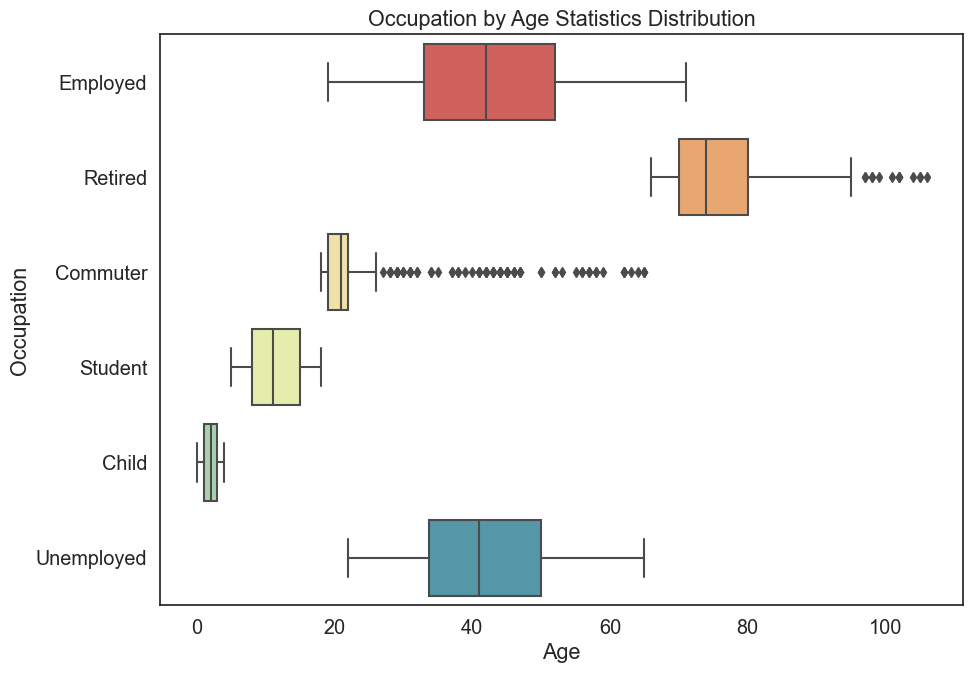

In [73]:
# The Distribution of the Occupation Column based on age with a boxplot
plt.figure(figsize=(10,7))
sns.set_style("white")
Occupation_boxplot = sns.boxplot(data = census_data, x = "Age", y="Occupation", palette="Spectral").set(title="Occupation by Age Statistics Distribution")
plt.tight_layout()
plt.savefig("Occupation Boxplot")

In [74]:
# Getting a statistical distribution of the Age based on occupation
census_data[["Age", "Occupation"]].groupby("Occupation").describe()

Age                                                      
             count       mean        std   min    25%   50%   75%    max
Occupation                                                              
Child        500.0   2.098000   1.377022   0.0   1.00   2.0   3.0    4.0
Commuter     643.0  22.959565   8.200272  18.0  19.00  21.0  22.0   65.0
Employed    4348.0  42.850736  12.016783  19.0  33.00  42.0  52.0   71.0
Retired      693.0  76.089466   7.034849  66.0  70.00  74.0  80.0  106.0
Student     1669.0  11.485321   3.991064   5.0   8.00  11.0  15.0   18.0
Unemployed   476.0  41.819328  10.803748  22.0  33.75  41.0  50.0   65.0

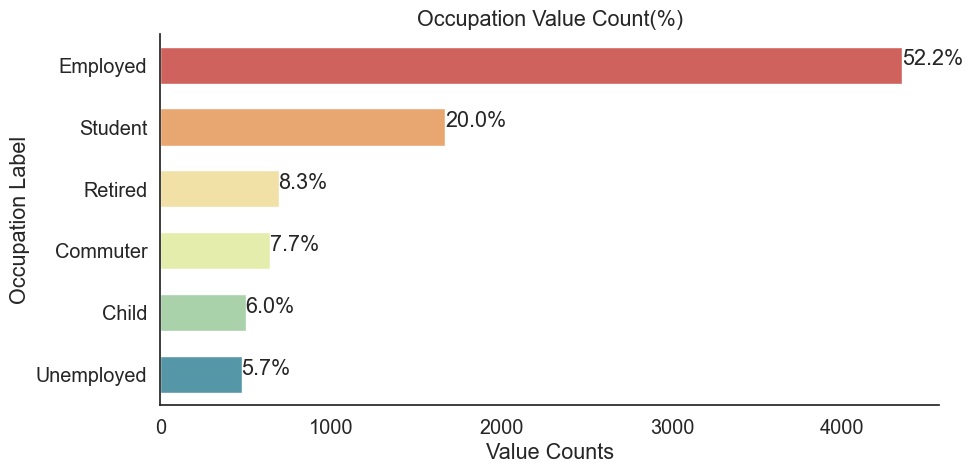

In [75]:
# Ploting the plot of the distribution based on the labels in the dataset


plt.figure(figsize=(10,5))
sns.set_style("white")

occupation =sns.barplot( data = occupation_counts, y="Occupation Label", x = "Value Counts", palette="Spectral", width=0.6)
occupation.set_title("Occupation Value Count(%)")

total = occupation_counts['Value Counts'].sum()
for p in occupation.patches:
        percentage = '{:.1f}%'.format((p.get_width()/total)*100)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        occupation.annotate(percentage, (x, y))
occupation.spines[['top', 'right']].set_visible(False)
#saving the figure
plt.tight_layout()
plt.savefig("occupation")
plt.show()

## For The Marital Status Column

In [76]:
# The purpose here is to determine the divorce and marriage rate which will help us to detemine the rate of Emmigration form the town
# This will be determine by the Divorce rate based on the male and female in the city

In [77]:
# Checking the unique labels in the Marital Status Column
census_data["Marital Status"].unique()

array(['Single', 'Married', 'Divorced', 'Not Applicable', 'Widowed'],
      dtype=object)

In [78]:
# Getting a statistical distribution of the Marital Status based on Age
census_data[["Age", "Marital Status"]].groupby("Marital Status").describe()

Age                                                     
                 count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         744.0  40.983871  16.728044  18.0  28.0  39.0  50.0  102.0
Married         2226.0  50.307727  15.965950  16.0  38.0  49.0  62.0  106.0
Not Applicable  2056.0   8.845817   5.053973   0.0   5.0   9.0  13.0   17.0
Single          2943.0  37.691471  14.153906  18.0  25.0  37.0  48.0   97.0
Widowed          360.0  62.061111  20.374943  18.0  45.0  68.0  76.0  105.0

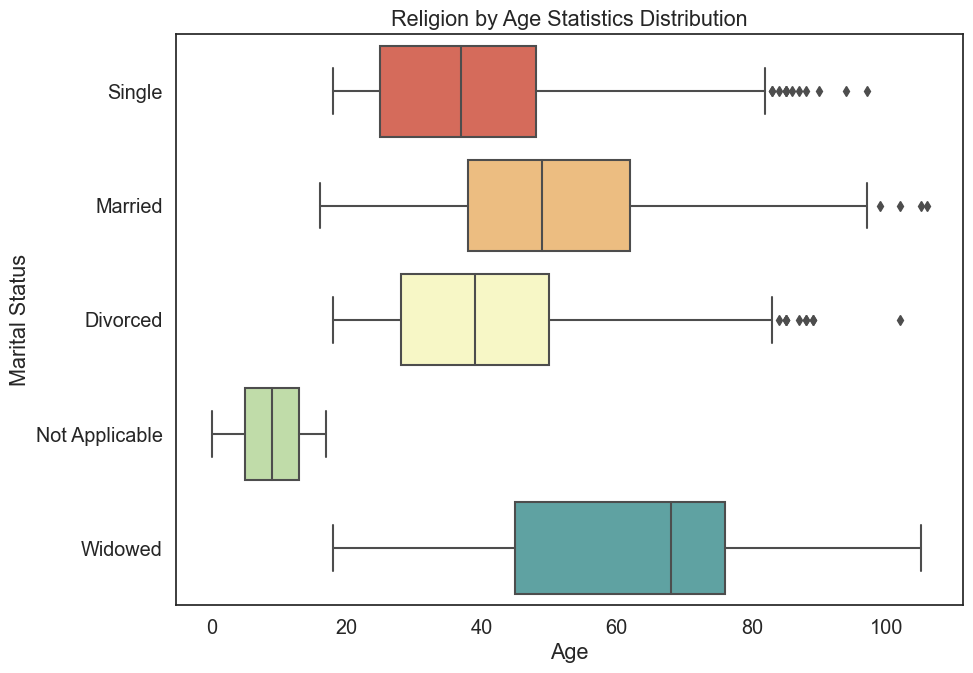

In [79]:
# A box plot of the marital status variables
plt.figure(figsize=(10,7))
sns.set_style("white")
Marital_boxplot = sns.boxplot(y=census_data["Marital Status"], x = census_data.Age, palette = "Spectral").set(title = "Religion by Age Statistics Distribution")
plt.tight_layout()
plt.savefig("MaritalBoxplot.png")

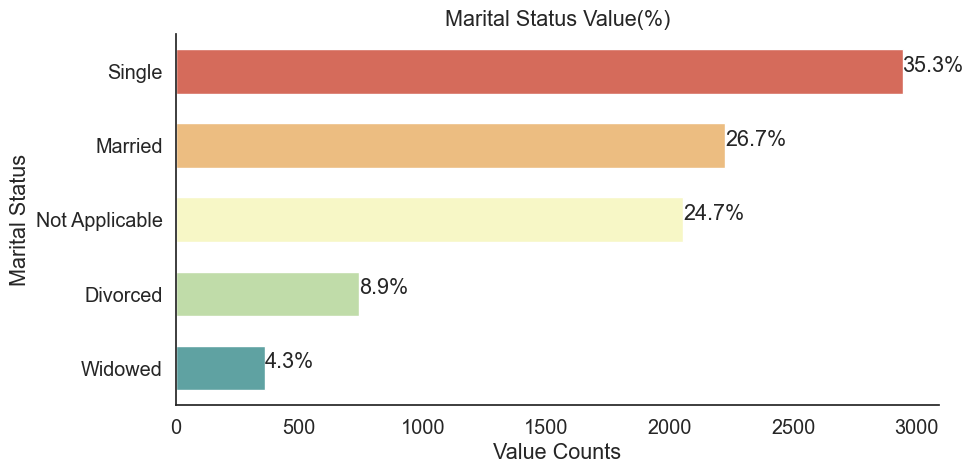

In [80]:
# Counting all the values in the marital Status
Marital_Status = census_data["Marital Status"].value_counts().rename_axis("Marital Status").reset_index(name="Value Counts")


# Plotting the values of the marital Status
plt.figure(figsize=(10,5))
sns.set_style("white")
Maritalplot= sns.barplot(y="Marital Status", x="Value Counts", data=Marital_Status, palette= "Spectral", width=0.6)
Maritalplot.set_title("Marital Status Value(%)")
total = Marital_Status['Value Counts'].sum()
for p in Maritalplot.patches:
        percentage = '{:.1f}%'.format((p.get_width()/total)*100)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        Maritalplot.annotate(percentage, (x, y))
Maritalplot.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig("Marital plot")

plt.show()

In [81]:
#Marital Status categories Value_counts
Marital_Status

,Marital Status,Value Counts
0,Single,2943
1,Married,2226
2,Not Applicable,2056
3,Divorced,744
4,Widowed,360


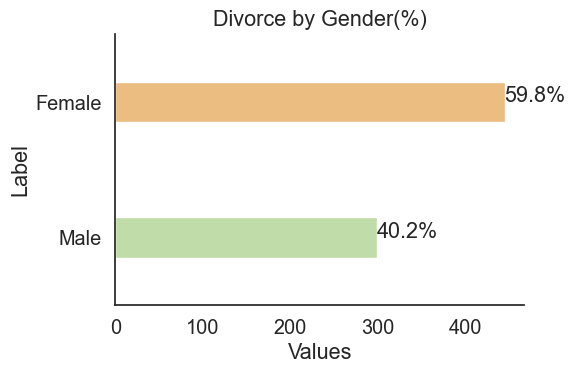

In [82]:
# Plot of the towns divorce rate based on gender
# Extrating the data needed for the new dataset
Divorced_female = census_data[(census_data["Marital Status"] == "Divorced") & (census_data.Gender == "Female")].count()[0]
Divorced_male = census_data[(census_data["Marital Status"] == "Divorced") & (census_data.Gender == "Male")].count()[0]

Divorces = pd.DataFrame({
    "Label": ["Female", "Male"],
    "Values": [Divorced_female, Divorced_male]
})
Divorces

#plottting the Marital Status Values
plt.figure(figsize=(6,4))
sns.set_style("white")
divorce = sns.barplot(y=Divorces.Label, x = Divorces.Values, width = 0.3, palette="Spectral")
divorce.set_title("Divorce by Gender(%)")
total = Divorces['Values'].sum()
for p in divorce.patches:
        percentage = '{:.1f}%'.format((p.get_width()/total)*100)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        divorce.annotate(percentage, (x, y))
divorce.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig("divorce")
plt.show()

## Calculating the Immgrants in the city and emigrants from the city

In [83]:
# immigrants are mostly number of lodgers who are not divorces and Visitors

immigrants = census_data[(~(census_data["Marital Status"]=="Divorced")) & 
                       (census_data["Relationship to Head of House"].str.contains("Lodger|Visitor"))].count()[0]
print(f"The Number of immigrants is {immigrants}")

The Number of immigrants is 339


### Calculating average based the Divorce Rate

In [84]:
# Calculating the divorce rate
# I will take the average divorce rate for women near the uk Average divorce rate of age over a 3 years period
# The marraige rate will be the number of divorced women plus the number of married women.

divorced_women_5 = census_data[(census_data.Age.between(39, 43))  & (census_data["Marital Status"] == "Divorced") & (census_data.Gender =="Female")].count()[0]
divorced_women_per_anum = divorced_women_5/5
print(f"Average divorce rate is {divorced_women_per_anum} per annum")


# Divorced Women between the same age bracket 
# The 5 represets the 5 years range while the 2 is used to divide to get the numbe of married woemn form the total number of married
married_women_5 = census_data[(census_data.Age.between(39, 43))  & (census_data["Marital Status"] == "Married")].count()[0]
married_women_per_anum = married_women_5/(5*2)
print(f"Average Married married {married_women_per_anum} per annum")

# To calculate the divorce rate per married population
divorce_rate = (divorced_women_per_anum/(len(census_data)))*1000
print(f"Divorce rate is: {divorce_rate} 1000 per annum")

Average divorce rate is 11.6 per annum
Average Married married 24.9 per annum
Divorce rate is: 1.3927242165926281 1000 per annum


### Calculating the Emigrant  Rate

In [86]:
# Emmigrants mostly university students and PhD  students
Emmigrants = Divorced_female - Divorced_male
print(f" the number of Emigrants is {Emmigrants}")

 the number of Emigrants is 146


## House Occupancy Rate

In [87]:
# Here i will examine the number of people licing in a house to determine the todtal 
# if the houses are being overused
# This will help detemine if the city need to invest in housing infrastucture

In [88]:
# Getting the total house Occupancy rate by group the "Street" and "House number" and

People_per_house = census_data.groupby(["Street", "House Number"]).size().reset_index(name="Number of People")
#Printing the number of people per house to examine the values
print(People_per_house.head())    

          Street  House Number  Number of People
0  Alba Crescent             1                 2
1  Alba Crescent             2                 1
2  Alba Crescent             3                 1
3  Alba Crescent             4                 1
4  Alba Crescent             5                 2


In [89]:
# House Occupancy Level based on the values of the data
House_occupancy = People_per_house["Number of People"].value_counts().rename_axis("House Occupancy").reset_index(name="counts")

#Sorting the values of the house Occupancy
House_occupancy.sort_values(by=["House Occupancy"])

,House Occupancy,counts
1,1,697
0,2,725
3,3,446
2,4,479
4,5,313
5,6,80
6,7,21
10,8,9
11,9,9
8,10,10


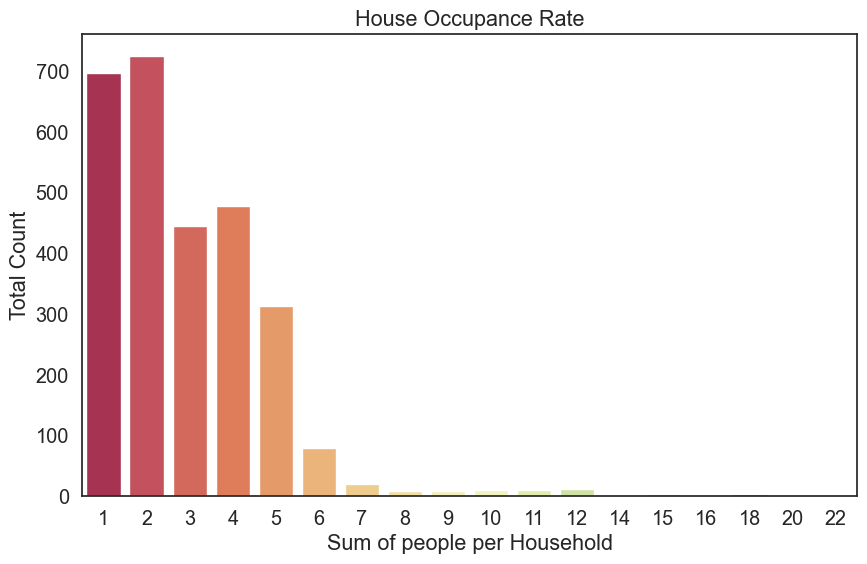

In [90]:
# Plotting the House Occcupancy rate 
plt.figure(figsize=(10,6))
sns.set_style("white")
occupancy = sns.barplot(data= House_occupancy, y="counts", x="House Occupancy" , palette = "Spectral").set(title = "House Occupance Rate", 
                                               ylabel = "Total Count", xlabel = "Sum of people per Household")

plt.savefig("Occupancy rate")

In [91]:
# Next analysis will be to understand why the some houses have a high number of people livng in it
# Note that since we dont have the number of total number of rooms in each house, we cannot accurately determine 
# if a household is overused or not

## Analysis of the towns Relgious Afiliations


In [92]:
# For the religion Column, we will examine the religious affiliations for town
# This is to enable us determine if any particular religous group in growing significantly 
# as to warant the biulding of a new place of worship
# Here we will use the boxplot and bar Plot

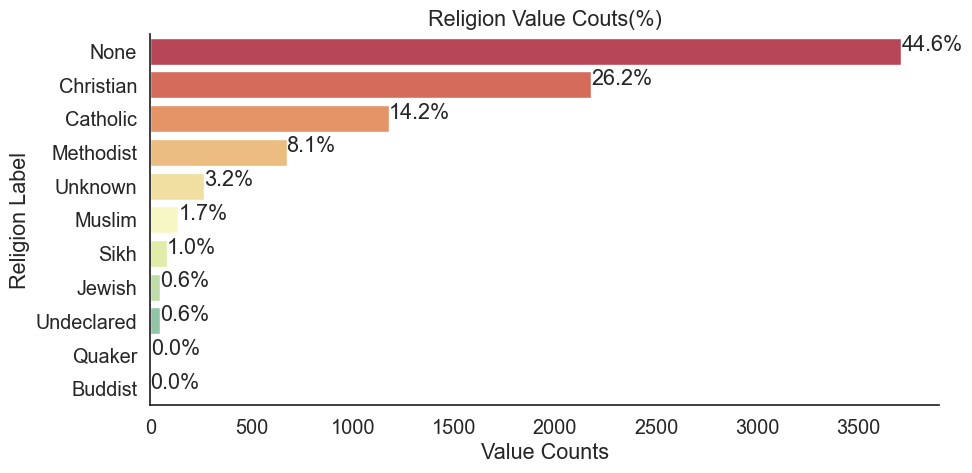

In [93]:
religion_counts = census_data["Religion"].value_counts().rename_axis("Religion Label").reset_index(name="Value Counts")

plt.figure(figsize=(10,5))
sns.set_style("white")
religionplot= sns.barplot(y="Religion Label", x="Value Counts", data=religion_counts, palette= "Spectral")
religionplot.set_title("Religion Value Couts(%)")
total = religion_counts['Value Counts'].sum()
for p in religionplot.patches:
        percentage = '{:.1f}%'.format((p.get_width()/total)*100)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        religionplot.annotate(percentage, (x, y))
religionplot.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig("religion plot")

plt.show()

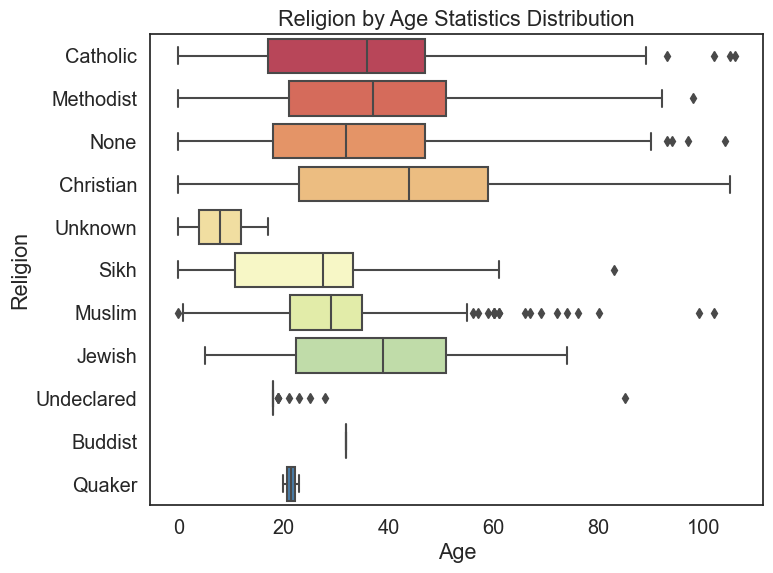

In [94]:
# The above plot shows that the three dorminant religion are christianity catholics and Methodist
# Next we will use a boxplot to determine the age distribution of the each religious group

# to evaluate the mean distribution of each religion agains the Age
plt.figure(figsize=(8,6))
sns.set_style("white")
Religion_boxplot = sns.boxplot(y=census_data.Religion, x = census_data.Age, palette = "Spectral").set(title = "Religion by Age Statistics Distribution")
# Religion_boxplot.set_xticklabels(Religion_boxplot.get_xticklabels(), rotation=45)

plt.tight_layout()
#Saving the plot
plt.savefig("Religion_boxplot.png")

## Analysis of the Towns Infirmity rate

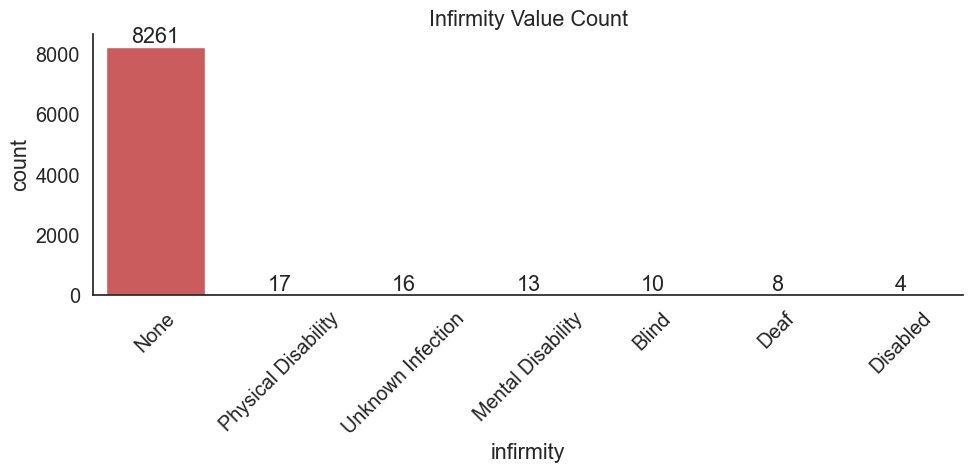

In [95]:
# This code if for using vount value without percentage in the plot
infirmity_counts = census_data["Infirmity"].value_counts().rename_axis("infirmity").reset_index(name="count")

plt.figure(figsize=(10,5))
sns.set_style("white")
infirmity = sns.barplot(x="infirmity", y="count", data=infirmity_counts, palette = "Spectral")
infirmity.set_title("Infirmity Value Count")
infirmity.bar_label(infirmity.containers[0])
infirmity.spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("infirmity")

## Calculating the age Group likely to be Unemployed

In [96]:
# Those unemployed
unemployed = census_data[census_data.Occupation == "Unemployed"]

# Getting the age value count for unemployed in the 
unemployed_age = unemployed["Age"].value_counts().rename_axis("Age").reset_index(name="count")

# Visualize the first five rows in the groop
unemployed_age.head()

,Age,count
0,41,27
1,40,23
2,35,21
3,43,18
4,50,17


In [97]:
# Creating a def function to group the Age of the unemployed in 5 years age group

def unemployed(y):
    if y <= 24:
        return "20-24"
    elif y <= 29:
        return "25-29"
    elif y <= 34:
        return "30-34"
    elif y <= 39:
        return "35-39"
    elif y <= 44:
        return "40-44"
    elif y <= 49:
        return "45-49"
    elif y <= 54:
        return "50-54"
    elif y <= 59:
        return "55-59"
    elif y <= 64:
        return "60-64"
    else:
        return "65-69"
    
    

In [98]:
# Applying the unemployed function to the unemplyed group c=age count
unemployed_age["age_range"] = unemployed_age["Age"].apply(unemployed)

# Viewing the first 5 rows 
unemployed_age.head()

,Age,count,age_range
0,41,27,40-44
1,40,23,40-44
2,35,21,35-39
3,43,18,40-44
4,50,17,50-54


In [99]:
# Grouping the count column by the age_range groups
unemployed_count = unemployed_age.groupby(["age_range"], as_index=False)["count"].sum()

In [100]:
unemployed_count.head()

,age_range,count
0,20-24,17
1,25-29,49
2,30-34,68
3,35-39,71
4,40-44,94


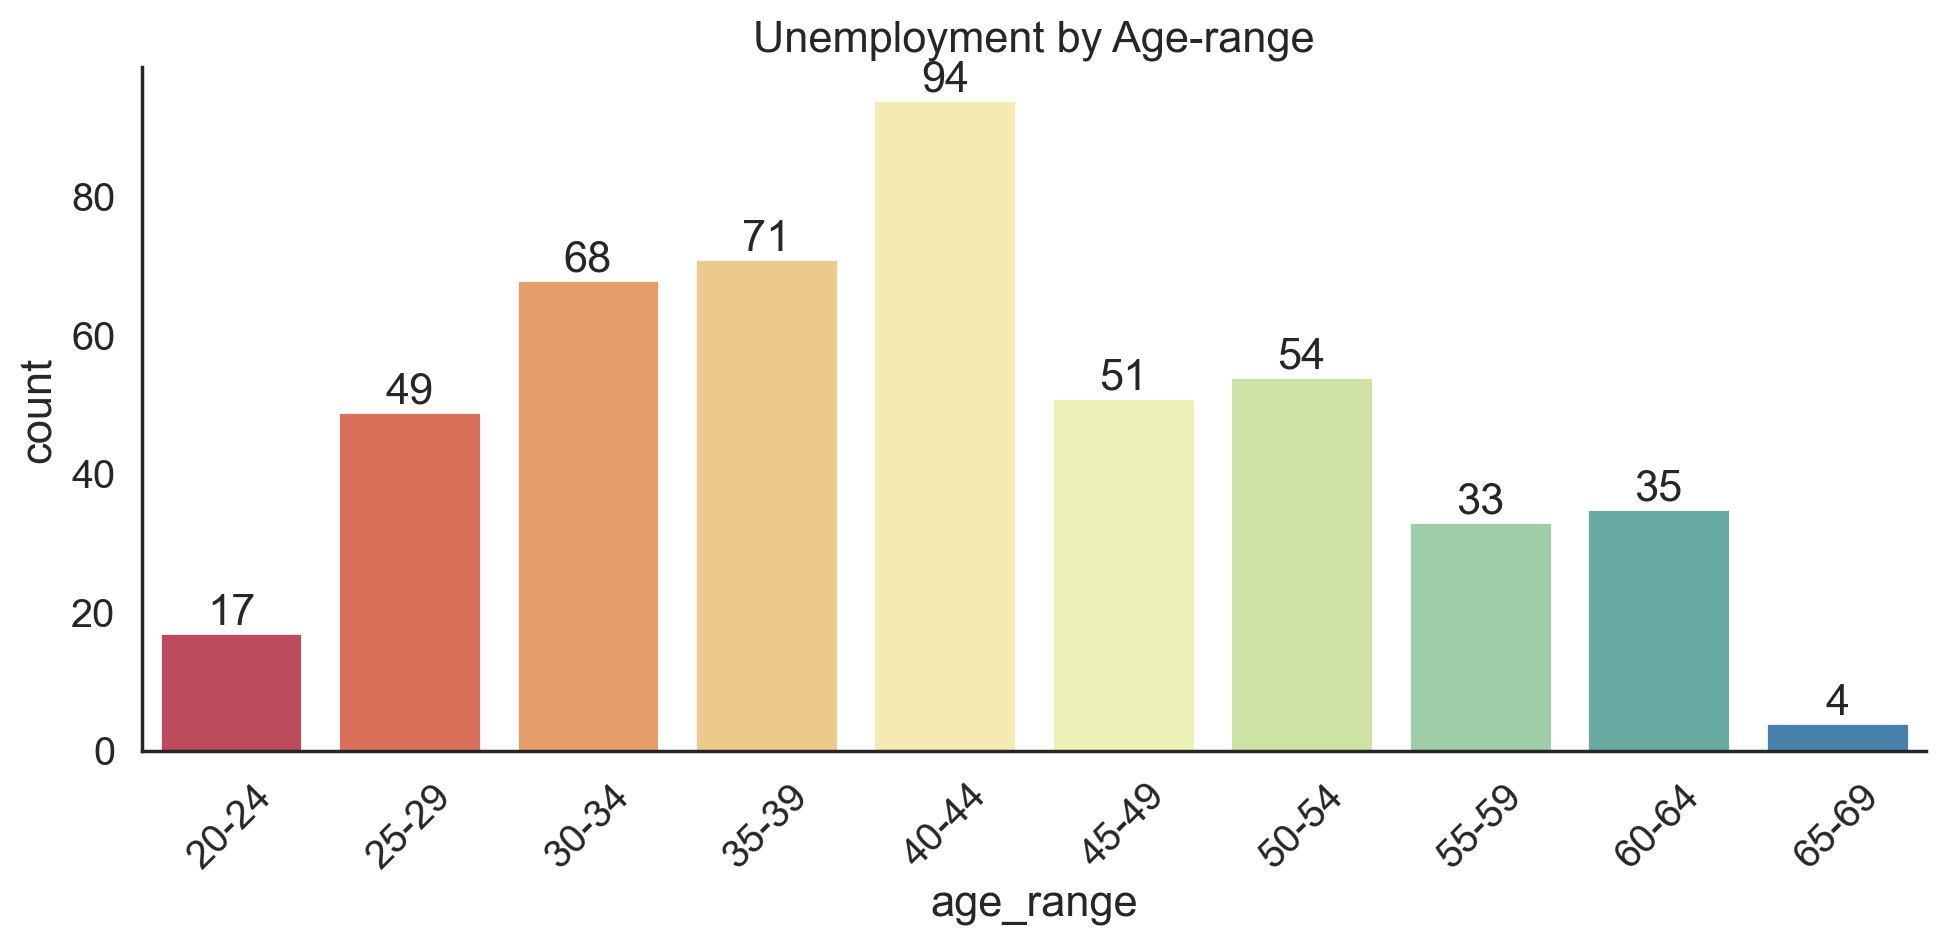

In [101]:
# Plot of the unemplyement age_range count values
plt.figure(figsize=(10,5), dpi=200)
sns.set_style("white")
unemployed_count = sns.barplot(data=unemployed_count, x="age_range", y="count", palette = "Spectral")
unemployed_count.set_title("Unemployment by Age-range")
unemployed_count.bar_label(unemployed_count.containers[0])
unemployed_count.spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("unemployed_count")

## ADDITIONAL CALCULATIONS

## People who might need house of their own tomorrow
### Those between 16 and 45 years, single, not Head of house and not University students 

In [102]:
# Those who might need a house tomorrow
accomodation_needs = census_data[(census_data.Age.between(16, 45)) & (census_data["Marital Status"] == "Single") & (~(census_data["Occupation"] == "University Student")) &(~(census_data["Relationship to Head of House"]=="Head"))].count()[0]


# Their percentager in the overall population

People_who_need_accomodation = round((accomodation_needs /len(census_data))*100)
print(F"The percentage of population that may need accoomodation in the nearest future is {People_who_need_accomodation}%")

The percentage of population that may need accoomodation in the nearest future is 17%


In [103]:

care_needs = census_data[(census_data.Age > 65)].count()[0]
care_needs

783

## For Residents who might need care, we assumed those who are above 65 years(Official age of retirement). 

In [104]:
# Percentage population residents who might require care
probable_care_need = round((care_needs /len(census_data))*100)
print(F"The percentage of population that may need care in the nearest future is {probable_care_need}%")

The percentage of population that may need accoomodation in the nearest future is 9%
